<a href="https://colab.research.google.com/github/almirei/almirei/blob/main/ANAC_Voos_e_opera%C3%A7%C3%B5es_aereas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importações

### 0.1. Instalação de pacotes

In [33]:
!pip install inflection

In [34]:
import math
import pandas as pd
import inflection 
import seaborn as sns
import matplotlib.pyplot as plt

### 0.3. Carregamento dos dados

In [35]:
#Importando o arquivo CSV compactado com ZIP, o qual usa o caractar ";" para separar as colunas e o charset do tipo "latin"
df_voos_raw = pd.read_csv('ANAC_Voos_Dados_Estatisticos.zip', low_memory=False,
                          encoding='latin', sep=';')

In [36]:
#Imprimindo algumas linas de exemplo para mostrar como ficou a estrutura
df_voos_raw.sample(10)

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,GRUPO DE VOO,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),CORREIO (KG),ASK,RPK,ATK,RTK,COMBUSTÍVEL (LITROS),DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
121898,NHG,BRAVA LINHAS AÉREAS LTDA. (EX- NHT),BRASILEIRA,2013,3,SBPK,PELOTAS,RS,SUL,BRASIL,AMÉRICA DO SUL,SBPA,PORTO ALEGRE,RS,SUL,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,IMPRODUTIVO,0.0,0.0,0.0,0.0,0.0,4199.0,0.0,358.0,0.0,250.0,221.0,1.0,0.000000e+00,0.0,0.0,19.0,1620.0,1,0.0
28906,TAM,TAM LINHAS AÉREAS S.A.,BRASILEIRA,2011,2,SBMO,RIO LARGO,AL,NORDESTE,BRASIL,AMÉRICA DO SUL,SBCT,SÃO JOSÉ DOS PINHAIS,PR,SUL,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,REGULAR,120.0,0.0,0.0,0.0,0.0,395676.0,384306.0,38430.0,34328.0,14111.0,2274.0,1.0,0.000000e+00,0.0,0.0,174.0,16900.0,"4,6",1727.0
152521,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASILEIRA,2014,7,SBTF,TEFÉ,AM,NORTE,BRASIL,AMÉRICA DO SUL,SWEI,EIRUNEPÉ,AM,NORTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,NÃO REGULAR,25.0,0.0,341.0,0.0,0.0,29744.0,16900.0,1777.0,1750.0,1220.0,676.0,1.0,2.305160e+05,0.0,0.0,44.0,2630.0,"1,73",374.0
257530,LCO,LAN CARGO S.A.,ESTRANGEIRA,2016,1,SPJC,"CALLAO/LIMA, LIMA METROPOLITAN AREA",NaN,NaN,PERU,AMÉRICA DO SUL,SPJC,"CALLAO/LIMA, LIMA METROPOLITAN AREA",NaN,NaN,PERU,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8427,GLO,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,BRASILEIRA,2011,3,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,TNCM,PHILIPSBURG,NaN,NaN,ILHA DE SÃO MARTINHO,AMÉRICA CENTRAL,INTERNACIONAL,NÃO REGULAR,62.0,84.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2586.0
268607,TAM,TAM LINHAS AÉREAS S.A.,BRASILEIRA,2016,6,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,SBSV,SALVADOR,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,REGULAR,10987.0,28.0,46658.0,0.0,0.0,15909500.0,13382200.0,1936250.0,1209570.0,423722.0,73080.0,60.0,5.682940e+07,0.0,0.0,13062.0,1589700.0,"122,08",122419.0
241634,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASILEIRA,2016,7,SBCT,SÃO JOSÉ DOS PINHAIS,PR,SUL,BRASIL,AMÉRICA DO SUL,SBPA,PORTO ALEGRE,RS,SUL,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,NÃO REGULAR,3734.0,70.0,5460.0,150.0,0.0,2325040.0,1984880.0,279297.0,170264.0,103677.0,19758.0,37.0,2.915640e+06,80100.0,0.0,4354.0,523065.0,"45,15",34823.0
318816,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASILEIRA,2018,5,SBBR,BRASÍLIA,DF,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,SBCY,VÁRZEA GRANDE,MT,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,REGULAR,2543.0,23.0,1327.0,0.0,0.0,2690640.0,2230210.0,264758.0,185227.0,111780.0,22802.0,26.0,1.163780e+06,0.0,0.0,3068.0,301908.0,"47,55",19164.0
354020,AFR,SOCIÉTÉ AIR FRANCE,ESTRANGEIRA,2019,3,LFPG,PARIS,NaN,NaN,FRANÇA,EUROPA,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,14699.0,104.0,545167.0,9197.0,21792.0,155822000.0,134200000.0,29721700.0,17098000.0,NaN,536085.0,57.0,4.821850e+09,83488200.0,198173000.0,16568.0,3160200.0,"666,83",NaN
240759,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASILEIRA,2016,6,SBAT,ALTA FLORESTA,MT,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,SBCY,VÁRZEA GRANDE,MT,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,REGULAR,2959.0,53.0,2644.0,142.0,0.0,2268500.0,1902640.0,314657.0,169445.0,89141.0,19290.0,30.0,1.700090e+06,91306.0,0.0,3528.0,489383.0,"36,44",38974.0


# 1. Descrição dos dados

In [37]:
# Fazendo uma cópia do dataset original antes da limpeza para agilizar no caso de precisar voltar e refazer algo perdido
df_voos = df_voos_raw.copy()

## 1.1. Renomeando colunas

In [38]:
# Substituindo colunas que possui apenas sigla por um nome mais significativo
df_voos.rename({'ASK': 'Assentos Oferecidos KM', 
                'RPK': 'Passageiros Transportados KM ', 
                'ATK' : 'Tonelada Oferecida KM', 
                'RTK' : 'Toneladas Transportadas KM'},
                axis=1, inplace=True)

# Colocando os nomes originais das colunas em uma lista
old_columns = df_voos.columns

# Criando uma função lambda para converter os nomes para o padrão Snake Case
snakecase_func = lambda x: inflection.parameterize( x, separator='_')

# Criando a lista com os novos nomes das colunas
new_columns = list( map( snakecase_func, old_columns))

# Substituindo o nome das colunas pela lista com os novos nomes
df_voos.columns = new_columns

# Amostra com as colunas renomeados
df_voos.sample(5)

,empresa_sigla,empresa_nome,empresa_nacionalidade,ano,mes,aeroporto_de_origem_sigla,aeroporto_de_origem_nome,aeroporto_de_origem_uf,aeroporto_de_origem_regiao,aeroporto_de_origem_pais,aeroporto_de_origem_continente,aeroporto_de_destino_sigla,aeroporto_de_destino_nome,aeroporto_de_destino_uf,aeroporto_de_destino_regiao,aeroporto_de_destino_pais,aeroporto_de_destino_continente,natureza,grupo_de_voo,passageiros_pagos,passageiros_gratis,carga_paga_kg,carga_gratis_kg,correio_kg,assentos_oferecidos_km,passageiros_transportados_km,tonelada_oferecida_km,toneladas_transportadas_km,combustivel_litros,distancia_voada_km,decolagens,carga_paga_km,carga_gratis_km,correio_km,assentos,payload,horas_voadas,bagagem_kg
8834,GLO,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,BRASILEIRA,2011,4,SBBE,BELÉM,PA,NORTE,BRASIL,AMÉRICA DO SUL,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,REGULAR,3531.0,74.0,3571.0,2.0,2075.0,10575400.0,8506800.0,1004410.0,810639.0,289200.0,73440.0,30.0,8741810.0,4896.0,6337870.0,4320.0,410301.0,"107,23",59985.0
383726,SKU,SKY AIRLINES S.A.,ESTRANGEIRA,2019,1,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,SCEL,SANTIAGO,NaN,NaN,CHILE,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,4119.0,0.0,0.0,0.0,0.0,13643100.0,12085100.0,1061570.0,1087650.0,NaN,73350.0,25.0,0.0,0.0,0.0,4650.0,361820.0,116,NaN
86119,TIB,TRIP SERVIÇOS DE SUPORTE AÉREO S.A (EX. TRIP L...,BRASILEIRA,2012,1,SBCT,SÃO JOSÉ DOS PINHAIS,PR,SUL,BRASIL,AMÉRICA DO SUL,SBRJ,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,REGULAR,3400.0,0.0,254.0,0.0,0.0,4880720.0,3050110.0,540041.0,261397.0,191191.0,53404.0,79.0,172380.0,0.0,0.0,7220.0,798939.0,"110,59",33196.0
197942,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASILEIRA,2015,7,SBPS,PORTO SEGURO,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,SBRJ,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,NÃO REGULAR,424.0,1.0,118.0,0.0,0.0,453654.0,354888.0,69906.0,31000.0,19298.0,4185.0,5.0,98766.0,0.0,0.0,542.0,83523.0,"8,21",5122.0
265526,STR,STERNA LINHAS AÉREAS LTDA.,BRASILEIRA,2016,9,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,DOMÉSTICA,NÃO REGULAR,0.0,1.0,10200.0,3200.0,0.0,0.0,0.0,32264.0,3437.0,15176.0,337.0,1.0,3437400.0,1078400.0,0.0,0.0,95739.0,"0,92",0.0


## 1.2. Dimensão dos dados

In [39]:
print('Número de linhas: {}'.format(df_voos.shape[0]))
print('Número de colunas: {}'.format(df_voos.shape[1]))

Número de linhas: 433640
Número de colunas: 38


## 1.3. Tipos de dados

In [40]:
df_voos.dtypes

empresa_sigla                       object
empresa_nome                        object
empresa_nacionalidade               object
ano                                  int64
mes                                  int64
aeroporto_de_origem_sigla           object
aeroporto_de_origem_nome            object
aeroporto_de_origem_uf              object
aeroporto_de_origem_regiao          object
aeroporto_de_origem_pais            object
aeroporto_de_origem_continente      object
aeroporto_de_destino_sigla          object
aeroporto_de_destino_nome           object
aeroporto_de_destino_uf             object
aeroporto_de_destino_regiao         object
aeroporto_de_destino_pais           object
aeroporto_de_destino_continente     object
natureza                            object
grupo_de_voo                        object
passageiros_pagos                  float64
passageiros_gratis                 float64
carga_paga_kg                      float64
carga_gratis_kg                    float64
correio_kg 

## 1.4. Validação de NA

In [41]:
# Verificando a quantidade de nulos
df_voos.isna().sum()

empresa_sigla                           0
empresa_nome                            0
empresa_nacionalidade                   0
ano                                     0
mes                                     0
aeroporto_de_origem_sigla             166
aeroporto_de_origem_nome              166
aeroporto_de_origem_uf              72267
aeroporto_de_origem_regiao          72267
aeroporto_de_origem_pais              166
aeroporto_de_origem_continente        166
aeroporto_de_destino_sigla              0
aeroporto_de_destino_nome               0
aeroporto_de_destino_uf             76754
aeroporto_de_destino_regiao         76754
aeroporto_de_destino_pais               0
aeroporto_de_destino_continente         0
natureza                                0
grupo_de_voo                            0
passageiros_pagos                   15436
passageiros_gratis                  15436
carga_paga_kg                       15436
carga_gratis_kg                     15436
correio_kg                        

In [42]:
# Preenchendo com "0" os colunas referentes a passageiros e cargas ofertadas e transportadas por embarque que estão vazios
df_voos.fillna({'passageiros_pagos' : 0 ,'passageiros_gratis' : 0,'carga_paga_kg' : 0, 'carga_gratis_kg' : 0, 'correio_kg': 0, 'assentos' : 0}, inplace=True)

# Preenchendo com "0" os colunas referentes a passageiros e cargas ofertadas e transportadas por quilômetro que estão vazios
df_voos.fillna({'assentos_oferecidos_km' : 0 ,'passageiros_transportados_km': 0,'tonelada_oferecida_km' : 0, 'toneladas_transportadas_km' : 0,
                'carga_paga_km': 0, 'carga_gratis_km' : 0, 'correio_km' : 0}, inplace=True)

# Preenchendo com "0" os colunas referentes a passageiros e cargas ofertadas e transportadas por embarque que estão vazios
df_voos.fillna({'distancia_voada_km' : 0 ,'decolagens' : 0}, inplace=True)

### OBSERVAÇÃO: 
* As colunas **aeroporto_de_origem_uf**, **aeroporto_de_origem_regiao**, **aeroporto_de_origem_continente**, **aeroporto_de_destino_uf**,**aeroporto_de_destino_regiao**, **aeroporto_de_destino_continente**, **combustivel_litros**, **payload**, **horas_voadas** e **bagagem_kg** não são úteis e por isso serão excluídos posteriormente;
* As colunas **aeroporto_de_origem_sigla**, **aeroporto_de_origem_nome** e **aeroporto_de_origem_pais** não serão tratados nesse dataset porque ocorrem apenas em voos de natureza **INTERNACIONAL**, e serão descartados posteriormente quando for filtrado apenas registros de natura **DOMÉSTICA**.



## 1.4. Filtragem de registros e colunas

### 1.4.1. Filtrando registros com características desejadas

In [43]:
# Eliminando registros duplicadas
df_voos = df_voos.drop_duplicates()

# Eliminando voos realizados por empresas não brasileiras
df_voos.drop(df_voos[df_voos['natureza'] != 'DOMÉSTICA'].index, inplace=True)

# Eliminando vôos que não geram receita para a empresa por serem atividades não fretadas como para
# realização de treinamento, manutenção de aeronaves
df_voos.drop(df_voos[df_voos['grupo_de_voo'] == 'IMPRODUTIVO'].index, inplace=True)

# Eliminando registros onde o aeroporto de origem e destino são os mesmos, o que impede a identificação se
# o voo teve inicio e foi abortado, se foi cancelado antes de qualquer operação, se foi algum teste ou
# ainda outro motivo que não caracteríza deslocamento e trasportede de pessoas e carga
df_voos.drop(df_voos[df_voos['aeroporto_de_origem_sigla'] == df_voos['aeroporto_de_destino_sigla']].index,
             inplace=True)

# Eliminando registros que não trazem nenhuma informação referente a passageiros e cargas
df_voos.drop(
    df_voos.loc[(df_voos['passageiros_pagos'] == 0) & (df_voos['passageiros_gratis'] == 0) & (df_voos['carga_paga_kg'] == 0) & (df_voos['carga_gratis_kg'] == 0) & (df_voos['correio_kg'] == 0) 
              & (df_voos['assentos_oferecidos_km'] == 0) & (df_voos['passageiros_transportados_km'] == 0)
              & (df_voos['tonelada_oferecida_km'] == 0) & (df_voos['toneladas_transportadas_km'] == 0) 
              & (df_voos['carga_paga_km'] == 0) & (df_voos['carga_gratis_km'] == 0) & (df_voos['correio_km'] == 0) & (df_voos['assentos'] == 0)].index, inplace=True)

# Eliminando registros onde não há assentos ofertados, mas há passageiro transportados. Esse caso é eliminado porque não há um fator de ocupação confiável para ser calculado
df_voos.drop(df_voos.loc[(df_voos['assentos_oferecidos_km'] < df_voos['passageiros_transportados_km']) & (df_voos['assentos_oferecidos_km'] == 0)].index, inplace=True)

# Foram encontrados voos onde a quantidade de passageiros é maior que a quantidade assentos ofertados. Não foi encontrado fontes que indiquem que não é permitido colocar mais passageiros que o ofertado.
# Por isso, vamos "supor" que haja um limite tolerável de 120% da taxa de ocupação e remover os demais que são maiores
df_voos.drop(df_voos.loc[((df_voos['passageiros_transportados_km'] / df_voos['assentos_oferecidos_km']) > 1.2)].index, inplace=True)

# Da mesma forma que foram removidos registros de voos com assentos oferecidos nulos e factor de ocupação superior a 120%, serão removidos também para as cargas
df_voos.drop(df_voos.loc[(df_voos['tonelada_oferecida_km'] < df_voos['toneladas_transportadas_km']) & (df_voos['tonelada_oferecida_km'] == 0)].index, inplace=True)
df_voos.drop(df_voos.loc[((df_voos['toneladas_transportadas_km'] / df_voos['tonelada_oferecida_km']) > 1.2)].index, inplace=True)

In [59]:
# Eliminando registros onde não há assentos ofertados, mas há passageiro transportados. 
df_voos.drop(
    df_voos.loc[
        (df_voos['assentos_oferecidos_km'] < df_voos['passageiros_transportados_km'])
        & (df_voos['assentos_oferecidos_km'] == 0)].index, inplace=True)

df_voos.drop(
    df_voos.loc[
        ((df_voos['passageiros_transportados_km'] / df_voos['assentos_oferecidos_km']) > 1.2)
    ].index, inplace=True)

df_voos.drop(
    df_voos.loc[
        (df_voos['tonelada_oferecida_km'] < df_voos['toneladas_transportadas_km'])
        & (df_voos['tonelada_oferecida_km'] == 0)].index, inplace=True)

df_voos.drop(
    df_voos.loc[
        ((df_voos['toneladas_transportadas_km'] / df_voos['tonelada_oferecida_km']) > 1.2)]
    .index, inplace=True)

In [44]:
# Imprimindo o número de registros após aplicado os filtros para limpar os dados
print('Número de registros após filtragem de dados: {}'.format(df_voos.shape[0]))

Número de registros após filtragem de dados: 268324


### 1.4.2. Removendo colunas desnecessárias

In [45]:
# Excluindo colunas que não eram serão utilizados
df_voos.drop(['empresa_nacionalidade','aeroporto_de_origem_uf', 'aeroporto_de_origem_regiao', 'aeroporto_de_origem_continente', 
              'aeroporto_de_destino_uf', 'aeroporto_de_destino_regiao', 'aeroporto_de_destino_continente',
              'combustivel_litros', 'payload', 'horas_voadas', 'bagagem_kg'], axis=1, inplace=True)

# Excluindo colunas que foram úteis apenas para a etapa de filtragem de registros
df_voos.drop(['natureza'], axis=1, inplace=True)

In [46]:
# Imprimindo o número de colunas após removidas as que não são úteis para a análise
print('Número de colunas após remoção: {}'.format(df_voos.shape[1]))

Número de colunas após remoção: 26


### 1.4.3. Padronizando valores que deveriam ser únicos

In [47]:
# Listando as siglas e o nomes das empresas para ver se existe alguma nome diferente para a mesma sigla
df_voos.groupby(['empresa_sigla', 'empresa_nome'])['empresa_sigla', 'empresa_nome'].size()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


empresa_sigla  empresa_nome                                                      
ABJ            ABAETÉ LINHAS AÉREAS LTDA                                                18
               ABAETÉ LINHAS AÉREAS S.A.                                               105
AZU            AZUL LINHAS AÉREAS BRASILEIRAS S/A                                    73773
CNT            CONNECT LINHAS AÉREAS S.A. (ANTIGA CONNECT TÁXI AÉREO LTDA.)            139
FYW            FLYWAYS LINHAS AÉREAS LTDA.                                              77
GLO            GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS S.A.)                   64352
IPM            ITAPEMIRIM TRANSPORTES AEREOS LTDA                                       37
LTG            ABSA - AEROLINHAS BRASILEIRAS S.A.                                     3611
MEL            MEGA LINHAS AÉREAS LTDA.                                                 26
MLI            MAIS LINHAS AÉREAS S.A                                                   35
MSQ     

In [60]:
# Subistituindo os nomes das empresas por um único 
df_voos["empresa_nome"].replace(
    {"ABAETÉ LINHAS AÉREAS LTDA": "ABAETÉ LINHAS AÉREAS S.A.",
     "MODERN TRANSPORTE AEREO DE CARGA S.A": "MODERN TRANSPORTE AÉREO DE CARGA S.A.",
     "TWO TÁXI AÉREO LTDA.": "AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)"}, inplace=True)

## 1.5. Incluindo novas colunas

In [49]:
# Fator de ocupação (Load Factor) de assentos por quilometro
df_voos['load_factor_assento_km'] = df_voos.apply( lambda x : x['passageiros_transportados_km'] / x['assentos_oferecidos_km'] if (x['assentos_oferecidos_km'] > 0) else 0, axis=1 )

# Fator de ocupação (Load Factor) de assentos por quilometro
df_voos['load_factor_carga_km'] = df_voos.apply( lambda x : x['toneladas_transportadas_km'] / x['tonelada_oferecida_km'] if (x['tonelada_oferecida_km'] > 0) else 0, axis=1 )

# 2. Análise dos dados

## 2.1. Analisando os fatores de ocupação

In [51]:
# Cria um dataframe só com dados de ocupações superior a zero
df_lf_assento = df_voos[(df_voos['load_factor_assento_km'] > 0)]
df_lf_carga = df_voos[(df_voos['load_factor_assento_km'] > 0)]

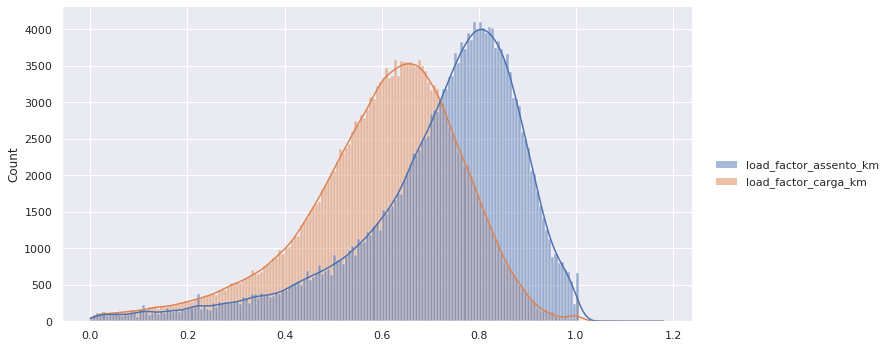

In [52]:
# Plota a distribuição do fator de ocupação de passageiro e carga geral para conferir se o valores estão detro de uma distribuição normal
sns.displot( [df_lf_assento['load_factor_assento_km'], df_lf_carga['load_factor_carga_km']], kde=True, aspect=2 )

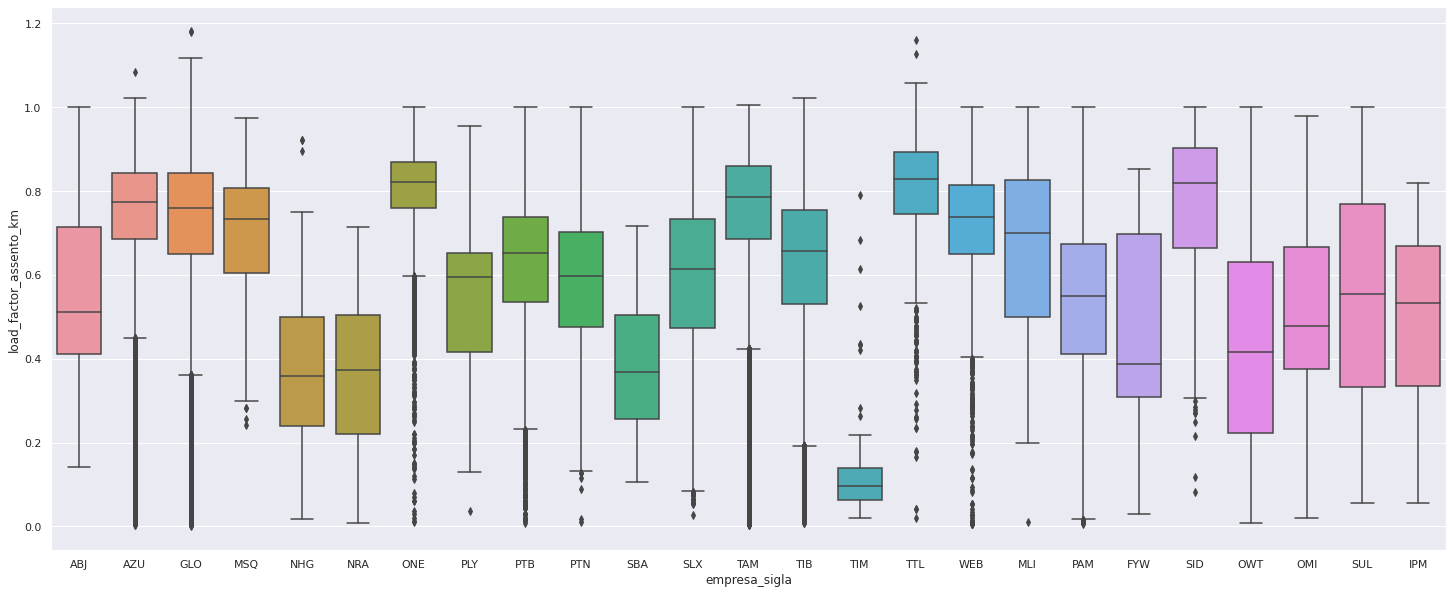

In [53]:
# Plotando a distribuição do fator de ocupação de passageiros separadamente por empresa, a fim de avaliar se há muitos outliers que possa compremeter muito a média
sns.set(rc={'figure.figsize':(25.0,10)})
sns.boxplot( x='empresa_sigla', y='load_factor_assento_km', data=df_lf_assento)

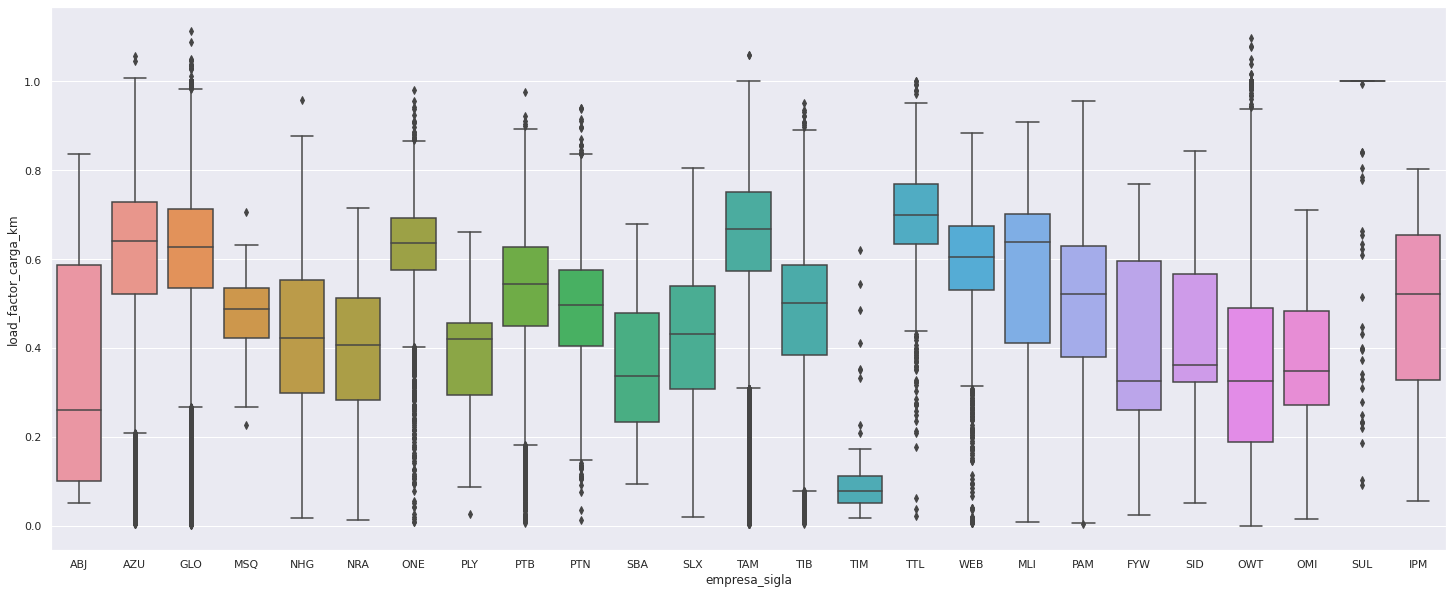

In [54]:
# Plotando a distribuição do fator de ocupação de passageiros separadamente por empresa, a fim de avaliar se há muitos outliers que possa compremeter muito a média
sns.set(rc={'figure.figsize':(25.0,10)})
sns.boxplot( x='empresa_sigla', y='load_factor_carga_km', data=df_lf_carga)

In [75]:
# Filtra somente os registro com fator de ocupação de assentos maior que zero e
# seleciona somente as colunas necessárias
df_lf_assento_empresa = df_voos.loc[(df_voos['load_factor_assento_km'] > 0) & (df_voos['ano'] == 2020)] \
  [['empresa_sigla', 'empresa_nome', 'ano', 'mes','load_factor_assento_km']]

# Calculo da média dos fatores de ocupação agrupados por ano, mês e empresa
df_lf_assento_empresa = df_lf_assento_empresa.groupby(by=['ano', 'mes', 'empresa_sigla', 'empresa_nome']) \
  ['load_factor_assento_km'].mean() \
  .reset_index() \
  .rename(columns={'load_factor_assento_km':'media'})

# Força a ordenação do valores
df_lf_assento_empresa.sort_values(by=['ano', 'mes', 'media'], ascending=True, inplace=True)  

# Cria uma nova coluna para armazenar o raking decrescente das médias de ocupação agrupadas por ano
df_lf_assento_empresa['ranking'] = df_lf_assento_empresa.groupby(['ano', 'mes'])['media'].rank(ascending=False).astype(int)

# Filtra para mostrar somente a maior média de cada ano
df_lf_assento_empresa = df_lf_assento_empresa.loc[(df_lf_assento_empresa['ranking'] <= 1)].drop(columns={'empresa_sigla','ranking'})

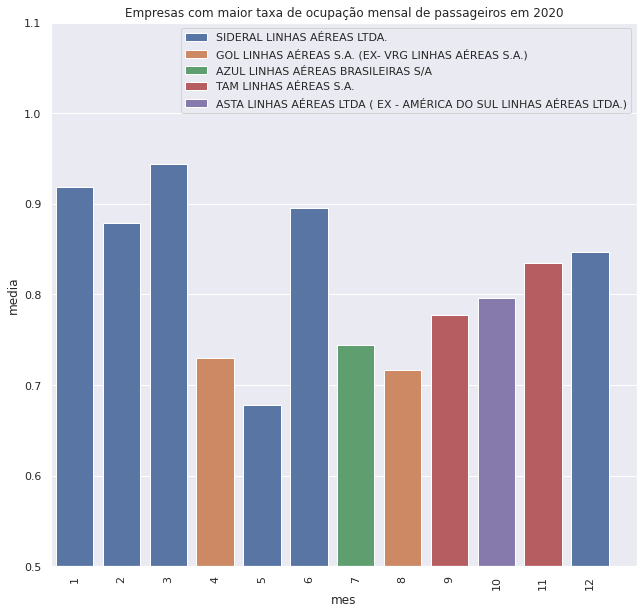

In [76]:
plt.figure(figsize=(10.5,10))
sns.barplot(x='mes', y='media', hue='empresa_nome', ci=None, dodge=False, data=df_lf_assento_empresa);
plt.title('Empresas com maior taxa de ocupação mensal de passageiros em 2020')
plt.xticks(rotation=90)
plt.xlim(right=12)
plt.ylim(0.5, 1.1)
plt.legend(loc='upper right')
plt.show()

In [77]:
# Filtra somente os registro com fator de ocupação de assentos maior que zero e
# seleciona somente as colunas necessárias
df_lf_carga_empresa = df_voos.loc[(df_voos['load_factor_carga_km'] > 0) & (df_voos['ano'] == 2020)] \
  [['empresa_sigla', 'empresa_nome', 'ano', 'mes','load_factor_carga_km']]

# Calculo da média dos fatores de ocupação agrupados por ano, mês e empresa
df_lf_carga_empresa = df_lf_carga_empresa.groupby(by=['ano', 'mes', 'empresa_sigla', 'empresa_nome']) \
  ['load_factor_carga_km'].mean() \
  .reset_index() \
  .rename(columns={'load_factor_carga_km':'media'})

# Força a ordenação do valores
df_lf_carga_empresa.sort_values(by=['ano', 'mes', 'media'], ascending=True, inplace=True)  

# Cria uma nova coluna para armazenar o raking decrescente das médias de ocupação agrupadas por ano
df_lf_carga_empresa['ranking'] = df_lf_carga_empresa.groupby(['ano', 'mes'])['media'].rank(ascending=False).astype(int)

# Filtra para mostrar somente a maior média de cada ano
df_lf_carga_empresa = df_lf_carga_empresa.loc[(df_lf_carga_empresa['ranking'] <= 1)].drop(columns={'empresa_sigla','ranking'})
df_lf_carga_empresa

,ano,mes,empresa_nome,media
10,2020,1,ASTA LINHAS AÉREAS LTDA ( EX - AMÉRICA DO SUL ...,0.814560
23,2020,2,ASTA LINHAS AÉREAS LTDA ( EX - AMÉRICA DO SUL ...,0.799658
35,2020,3,ASTA LINHAS AÉREAS LTDA ( EX - AMÉRICA DO SUL ...,0.904315
39,2020,4,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,0.570957
50,2020,5,MODERN TRANSPORTE AÉREO DE CARGA S.A.,0.668145
63,2020,6,ASTA LINHAS AÉREAS LTDA ( EX - AMÉRICA DO SUL ...,0.772716
74,2020,7,ASTA LINHAS AÉREAS LTDA ( EX - AMÉRICA DO SUL ...,1.000000
84,2020,8,ASTA LINHAS AÉREAS LTDA ( EX - AMÉRICA DO SUL ...,1.000000
95,2020,9,ASTA LINHAS AÉREAS LTDA ( EX - AMÉRICA DO SUL ...,1.000000
106,2020,10,ASTA LINHAS AÉREAS LTDA ( EX - AMÉRICA DO SUL ...,1.000000


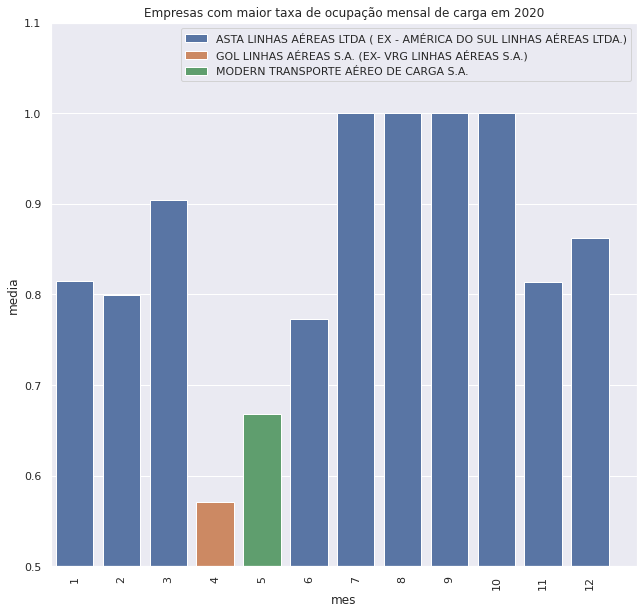

In [78]:
plt.figure(figsize=(10.5,10))
sns.barplot(x='mes', y='media', hue='empresa_nome', ci=None, dodge=False, data=df_lf_carga_empresa);
plt.title('Empresas com maior taxa de ocupação mensal de carga em 2020')
plt.xticks(rotation=90)
plt.xlim(right=12)
plt.ylim(0.5, 1.1)
plt.legend(loc='upper right')
plt.show()

## 2.2. Tipo de ativos transportados por empresa

In [183]:
# Selecionando apenas registros com fator de ocupação maior que zero
df_empresa_carga = df_voos.loc[(df_voos['load_factor_carga_km'] > 0)]

# Agrupando dos dados identificando quais empresas transportam passageiros e/ou carga
df_empresa_carga = df_empresa_carga.groupby(by=['empresa_sigla', 'empresa_nome', 'mes']).apply(lambda x: pd.Series({ 
    "transporta_passageiros": True if ((x['passageiros_pagos'].sum() + x['passageiros_gratis'].sum() + x['passageiros_transportados_km'].sum()) > 0) else False, 
    "transporta_carga": True if ((x['carga_paga_kg'].sum() + x['carga_gratis_kg'].sum() + x['toneladas_transportadas_km'].sum() + x['carga_paga_km'].sum() + x['carga_gratis_km'].sum()) > 0) else False, 
    "load_factor_carga_km": x['load_factor_carga_km'].mean() 
})).reset_index()

# Selecionando somente as empresas que transporta carga, mas não passageiros
df_lf_carga_mes = df_empresa_carga[(df_empresa_carga.transporta_passageiros == False) & (df_empresa_carga.transporta_carga == True)]

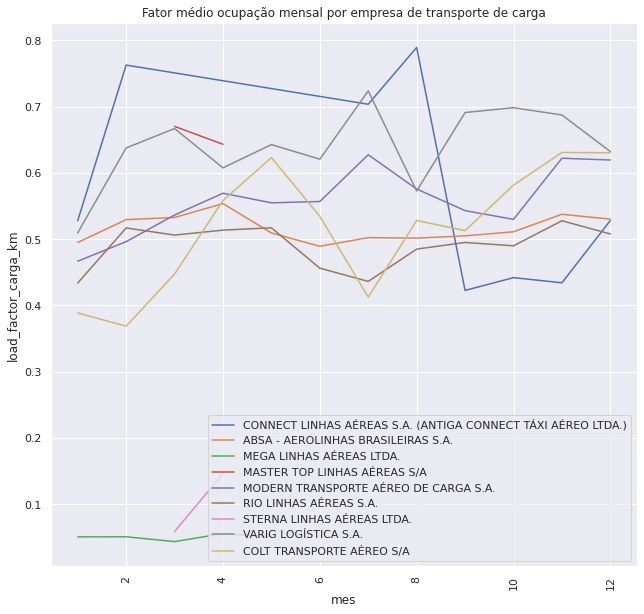

In [192]:
plt.figure(figsize=(10.5,10.0))
sns.lineplot(x='mes', hue='empresa_nome', y='load_factor_carga_km', estimator=None, data=df_lf_carga_mes)
plt.title('Fator médio ocupação mensal por empresa de transporte de carga')
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.show()

## 2.3. Maior volume de passageiro por empresa

In [196]:
# Agrupando as empresas por ano, somando todos os passageiro transportados, sendo pagos ou gratuitos
df_empresa_qt_passageiro = df_voos.groupby(by=['empresa_sigla', 'empresa_nome', 'ano']).apply(lambda x: pd.Series({ 
    "qt_passageiros": x['passageiros_pagos'].sum() + x['passageiros_gratis'].sum()
})).reset_index()

# Força a ordenação do valores
df_empresa_qt_passageiro.sort_values(by=['ano', 'qt_passageiros'], ascending=True, inplace=True)  

# Fazendo o ranqueamento por quantidade de passageiros
df_empresa_qt_passageiro['ranking'] = df_empresa_qt_passageiro.groupby(['ano'])['qt_passageiros'].rank(ascending=False).astype(int)

# Seleção do top 3 das empresas com maior volume de passageiros
df_empresa_qt_passageiro = df_empresa_qt_passageiro.loc[(df_empresa_qt_passageiro['ranking'] <= 3)].drop(columns={'empresa_sigla','ranking'})

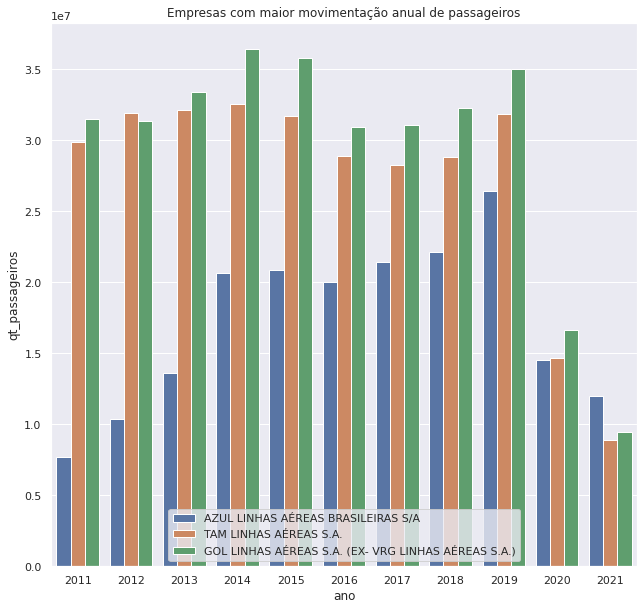

In [195]:
plt.figure(figsize=(10.5,10))
sns.barplot(x='ano', y='qt_passageiros', hue='empresa_nome', ci=None,  data=df_empresa_qt_passageiro);
plt.title('Empresas com maior movimentação anual de passageiros')
plt.legend(loc='lower center')
plt.show()

## 2.4. Aeroportos com maior quantidade de empresas decolando e pousando

In [296]:
# Agrupando registros por aeroportos onde são feitas as decolagens e as empresas que as fazem,
# alterando o nome das colunas de aeroporto para não distinguir entre origem e destino
df_aeroporto_origem = df_voos.groupby(by=['aeroporto_de_origem_sigla', 'aeroporto_de_origem_nome', 'empresa_sigla'])['empresa_sigla'].nunique().reset_index(name='qt').rename(
    columns={'aeroporto_de_origem_sigla':'aeroporto_sigla','aeroporto_de_origem_nome' : 'aeroporto_nome'})

# Agrupando registros por aeroportos onde são feitos os pousos e as empresas que os fazem,
# alterando o nome das colunas de aeroporto para não distinguir entre origem e destino
df_aeroporto_destino = df_voos.groupby(by=['aeroporto_de_destino_sigla', 'aeroporto_de_destino_nome', 'empresa_sigla'])['empresa_sigla'].nunique().reset_index(name='qt').rename(
    columns={'aeroporto_de_destino_sigla':'aeroporto_sigla','aeroporto_de_destino_nome' : 'aeroporto_nome'})

# Mesclando os 2 dataframes unificando em um único registro os mesmos aeroportos e empresas
df_empresa_por_aeroporto = pd.merge(df_aeroporto_origem, df_aeroporto_destino, on=['aeroporto_sigla', 'aeroporto_nome', 'empresa_sigla']) \
  .set_index(['aeroporto_sigla', 'aeroporto_nome', 'empresa_sigla']).count(axis=1).reset_index()

# Agrupando os aeroportos para quantificiar as empresas
df_empresa_por_aeroporto = df_empresa_por_aeroporto.groupby(by=['aeroporto_sigla', 'aeroporto_nome'])['empresa_sigla'].count().reset_index(name='qt_empresas')

# Ordenando por quantidade de empresa, começando pela maior quantidade
df_empresa_por_aeroporto.sort_values(by=['qt_empresas'], ascending=False, inplace=True) 

No handles with labels found to put in legend.


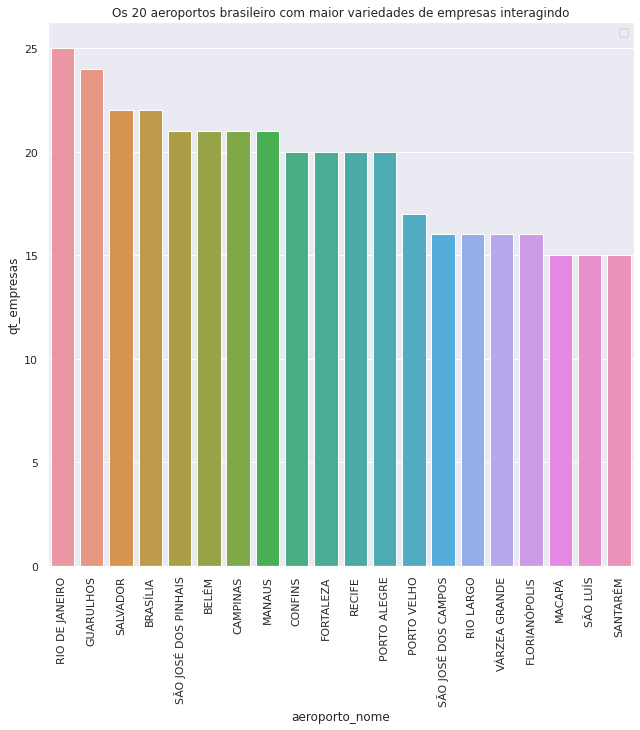

In [295]:
plt.figure(figsize=(10.5,10))
sns.barplot(x='aeroporto_nome', y='qt_empresas', ci=None, dodge=False, data=df_empresa_por_aeroporto.head(20));
plt.title('Os 20 aeroportos brasileiro com maior variedades de empresas interagindo')
plt.xticks(rotation=90)
#plt.xlim(right=12)
#plt.ylim(12, 26)
plt.legend(loc='upper right')
plt.show()